In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Cleaning Data 

In [4]:
#checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [5]:
#check data types
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
#turning budget and gross col into int
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [7]:
#create new col for year that is corrected
df['year_correct'] = df['released'].astype(str).str[:4]

In [8]:
#order data by gross revenue 
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [9]:
#drop any duplicates 
df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


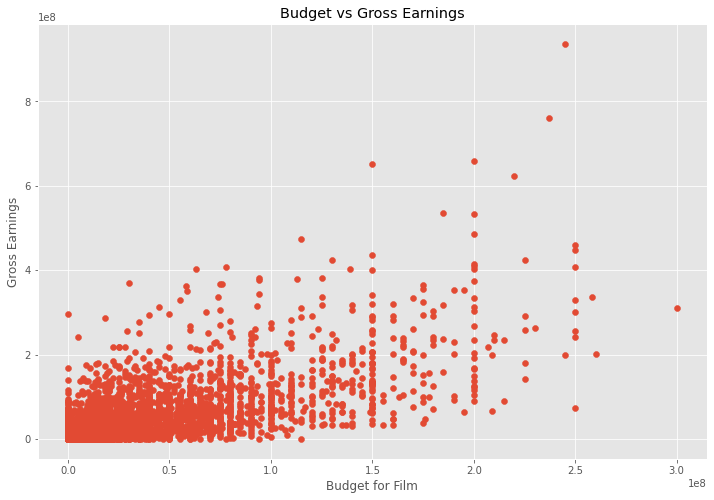

In [10]:
#scatter plot with budget vs gross 

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

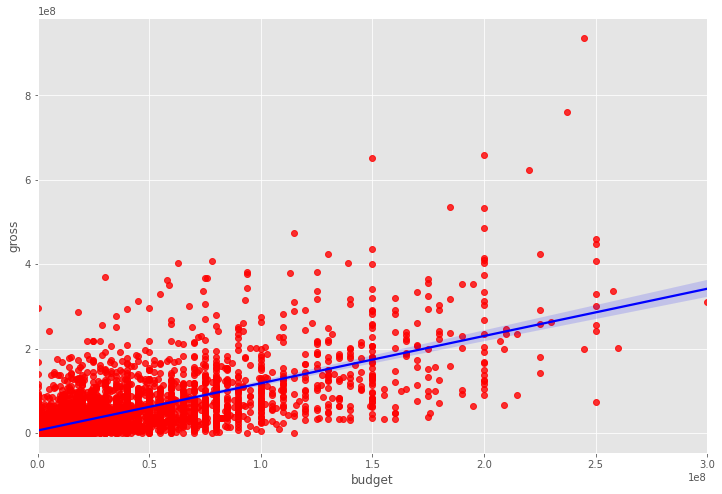

In [11]:
#plot budget vs gross

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color': 'red'},line_kws={'color':'blue'})

<AxesSubplot:xlabel='score', ylabel='gross'>

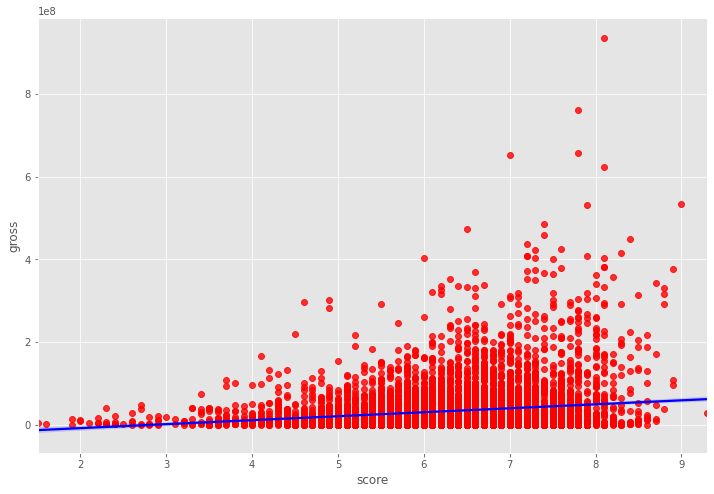

In [12]:
#plot score vs gross

sns.regplot(x='score',y='gross',data=df,scatter_kws={'color': 'red'},line_kws={'color':'blue'})

Text(87.0, 0.5, 'Movie Features')

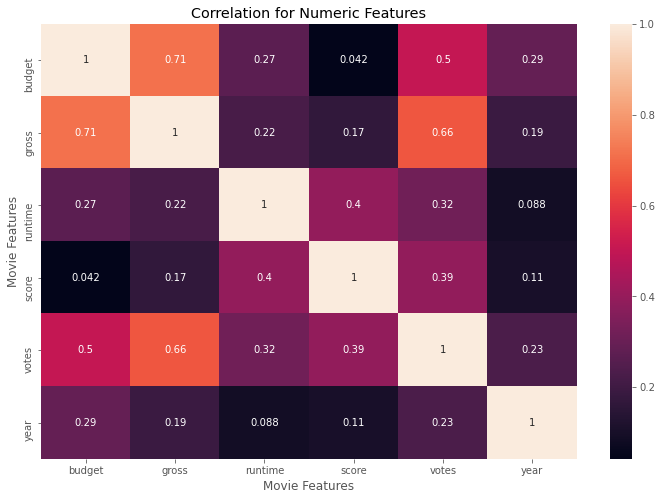

In [13]:
#look at correlation
sns.heatmap(df.corr(method='pearson'),annot=True)

plt.title('Correlation for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [14]:
#high correlation between budget and gross

In [15]:
#convert df objects to category type 
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
budget,1.000000,0.095504,-0.028062,0.080628,0.119652,0.115788,0.117957,0.101400,0.059645,0.040488,0.004604,0.077698,0.119393,0.075271,-0.002140,-0.012925
company,0.095504,1.000000,0.344712,0.647567,0.070490,0.714419,0.702854,0.377810,0.313695,0.007934,-0.036872,0.580693,0.691879,0.645280,0.033326,0.038966
country,-0.028062,0.344712,1.000000,0.277133,-0.024093,0.279401,0.275837,0.241951,0.107884,0.028241,-0.164288,0.288864,0.266566,0.287553,-0.052244,-0.042272
director,0.080628,0.647567,0.277133,1.000000,0.072156,0.756448,0.743649,0.334472,0.376711,0.015257,0.050784,0.593229,0.743359,0.724076,0.094323,0.102663
genre,0.119652,0.070490,-0.024093,0.072156,1.000000,0.101394,0.102866,0.097025,0.073920,-0.003693,0.027134,0.083625,0.102707,0.072177,0.040547,0.030490
gross,0.115788,0.714419,0.279401,0.756448,0.101394,1.000000,0.985850,0.411240,0.476354,0.014827,0.037916,0.657912,0.981340,0.817174,0.113675,0.114888
name,0.117957,0.702854,0.275837,0.743649,0.102866,0.985850,1.000000,0.405936,0.470290,0.015281,0.038703,0.648663,0.968189,0.808108,0.108869,0.109313
rating,0.101400,0.377810,0.241951,0.334472,0.097025,0.411240,0.405936,1.000000,0.200424,0.047989,-0.121917,0.361834,0.399032,0.358276,0.025147,0.025221
released,0.059645,0.313695,0.107884,0.376711,0.073920,0.476354,0.470290,0.200424,1.000000,0.004341,0.078252,0.346635,0.472551,0.404891,0.242076,0.267543
runtime,0.040488,0.007934,0.028241,0.015257,-0.003693,0.014827,0.015281,0.047989,0.004341,1.000000,-0.022387,0.027886,0.014370,0.000426,0.000274,0.001450


Text(86.59375, 0.5, 'Movie Features')

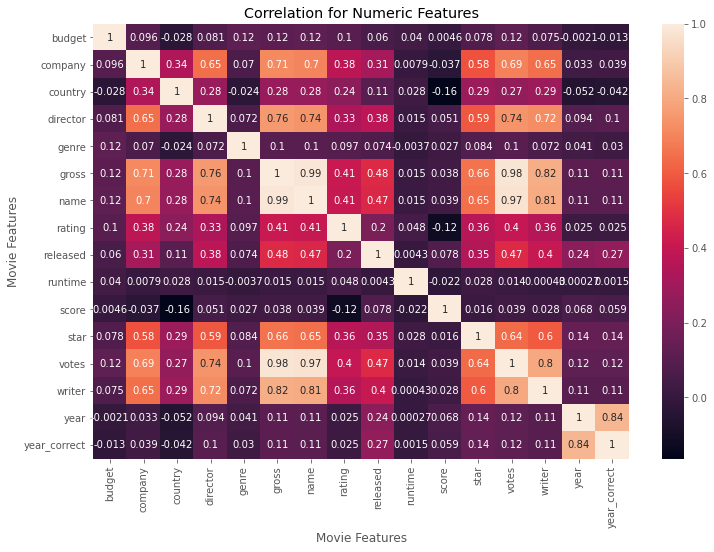

In [16]:
#look at correlation
corr_map = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(corr_map,annot=True)

plt.title('Correlation for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [17]:
#unstacking
corr_matrix = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = corr_matrix.unstack()

corr_pairs

budget        budget          1.000000
              company         0.095504
              country        -0.028062
              director        0.080628
              genre           0.119652
                                ...   
year_correct  star            0.138407
              votes           0.119379
              writer          0.107822
              year            0.838923
              year_correct    1.000000
Length: 256, dtype: float64

In [18]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

country       score          -0.164288
score         country        -0.164288
rating        score          -0.121917
score         rating         -0.121917
country       year           -0.052244
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [19]:
#high corr
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

star          company         0.580693
company       star            0.580693
director      star            0.593229
star          director        0.593229
              writer          0.598075
writer        star            0.598075
votes         star            0.639584
star          votes           0.639584
company       writer          0.645280
writer        company         0.645280
company       director        0.647567
director      company         0.647567
name          star            0.648663
star          name            0.648663
              gross           0.657912
gross         star            0.657912
company       votes           0.691879
votes         company         0.691879
name          company         0.702854
company       name            0.702854
gross         company         0.714419
company       gross           0.714419
director      writer          0.724076
writer        director        0.724076
votes         director        0.743359
director      votes      

In [20]:
# Votes and budget have the highest correlation to gross earnings 

# Company has low correlation

In [21]:
# Top 15 companies by gross revenue

company_gross_sum = df.groupby('company')[["gross"]].sum()

company_gross_sum = company_gross_sum.sort_values('gross', ascending = False)[:15]

company_gross_sum = company_gross_sum['gross'].astype('int64') 

company_gross_sum

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

In [22]:
#convert year into str using released col
df['Year'] = df['released'].astype(str).str[:4]

In [23]:
#groupby company and year by gross um
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,26183197
1+2 Seisaku Iinkai,2000,1136776
101st Street Films,1998,306715
10th Hole Productions,2010,103280
120 Films,2002,753501
...,...,...
Zucker Brothers Productions,1998,6940185
double A Films,2000,1568749
erbp,2013,444098


In [24]:
# Top 15 companies by gross revenue and year

company_gross_sum = df.groupby(['company','year'])[["gross"]].sum()

company_gross_sum = company_gross_sum.sort_values(['gross', 'company'], ascending = False)[:15]

company_gross_sum = company_gross_sum['gross'].astype('int64') 

company_gross_sum

company                                 year
Paramount Pictures                      2011    1486604229
Universal Pictures                      2015    1411831667
Warner Bros.                            2008    1327598616
                                        2010    1255477478
                                        2011    1217527619
                                        2005    1175793638
Twentieth Century Fox Film Corporation  2009    1173191407
Warner Bros.                            2006    1154792759
                                        2009    1146640373
Walt Disney Pictures                    2010    1134883375
Columbia Pictures                       2011    1072753462
Universal Pictures                      2013    1066421491
Warner Bros.                            2014    1062468828
Universal Pictures                      2007    1057955786
Columbia Pictures                       2012    1020616938
Name: gross, dtype: int64

In [ ]:
sns.stripplot(x='rating',y='gross',data=df)